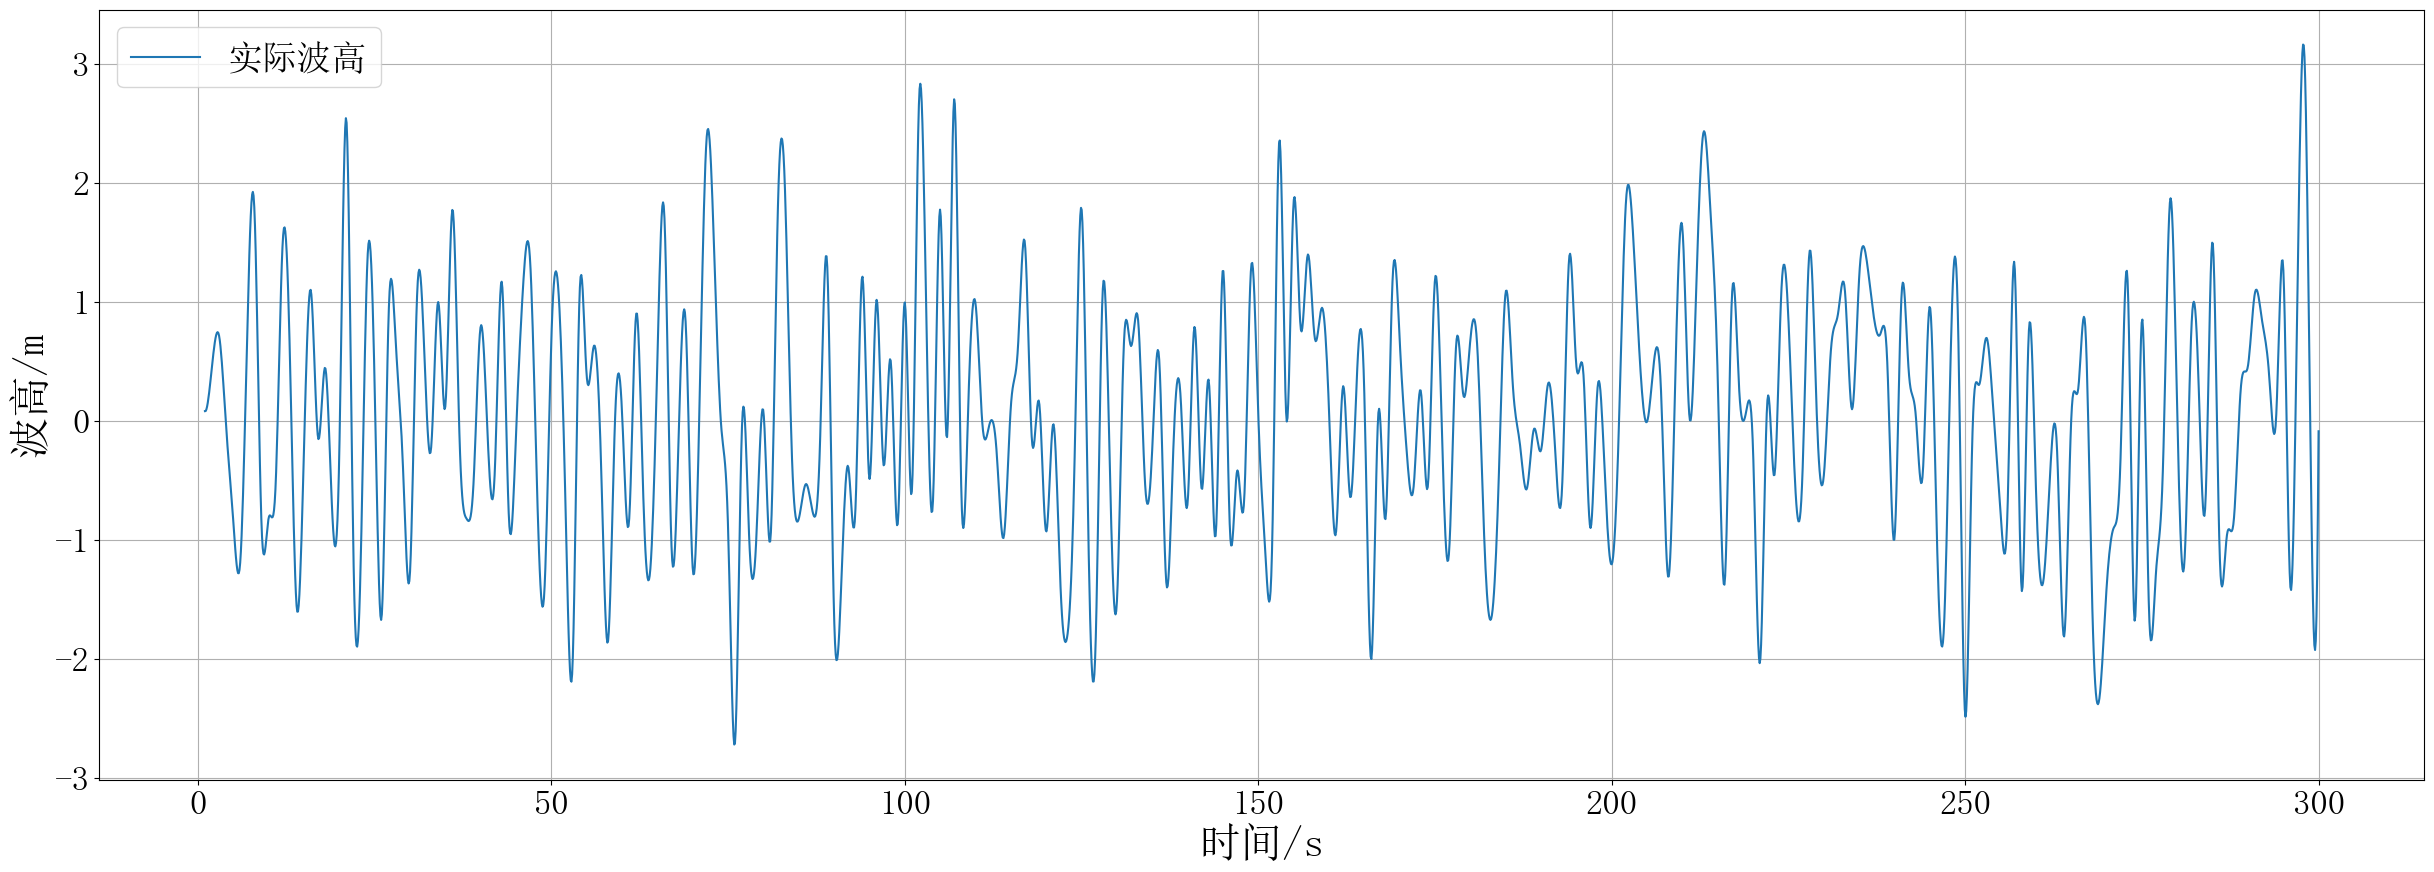

In [45]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np
from models.crnn import RNNnet as RNNnet
import torch
font_path = 'C:\Windows\Fonts\simsun.ttc'
plt.rcParams['font.sans-serif'] = ['SimSun'] # 指定默认字体 （这里是宋体）
plt.rcParams['axes.unicode_minus'] = False

data = np.load('data/chengjun.npy')

t = np.linspace(1, 300, 300) 
actual = interp1d(t, data[:300,0], kind='cubic')

# prediction = interp1d(x,prediction, kind='cubic')
x_dense = np.linspace(1, 300, 3000)

plt.figure(figsize=(30, 10))
plt.plot(x_dense, actual(x_dense), '-', label='实际波高')
# plt.plot(x_dense, prediction(x_dense), '-', label='Prediction')
plt.legend(fontsize=25)
# plt.title(f'time{time}')
plt.xticks(fontsize=25)  # 设置横坐标数字大小为 12
plt.yticks(fontsize=25)  # 设置纵坐标数字大小为 12
plt.xlabel('时间/s', fontsize=30)
plt.ylabel('波高/m', fontsize=30)
plt.grid(True)
plt.savefig('actual.svg')
plt.show()

# 图 3-4 （a）和（b）

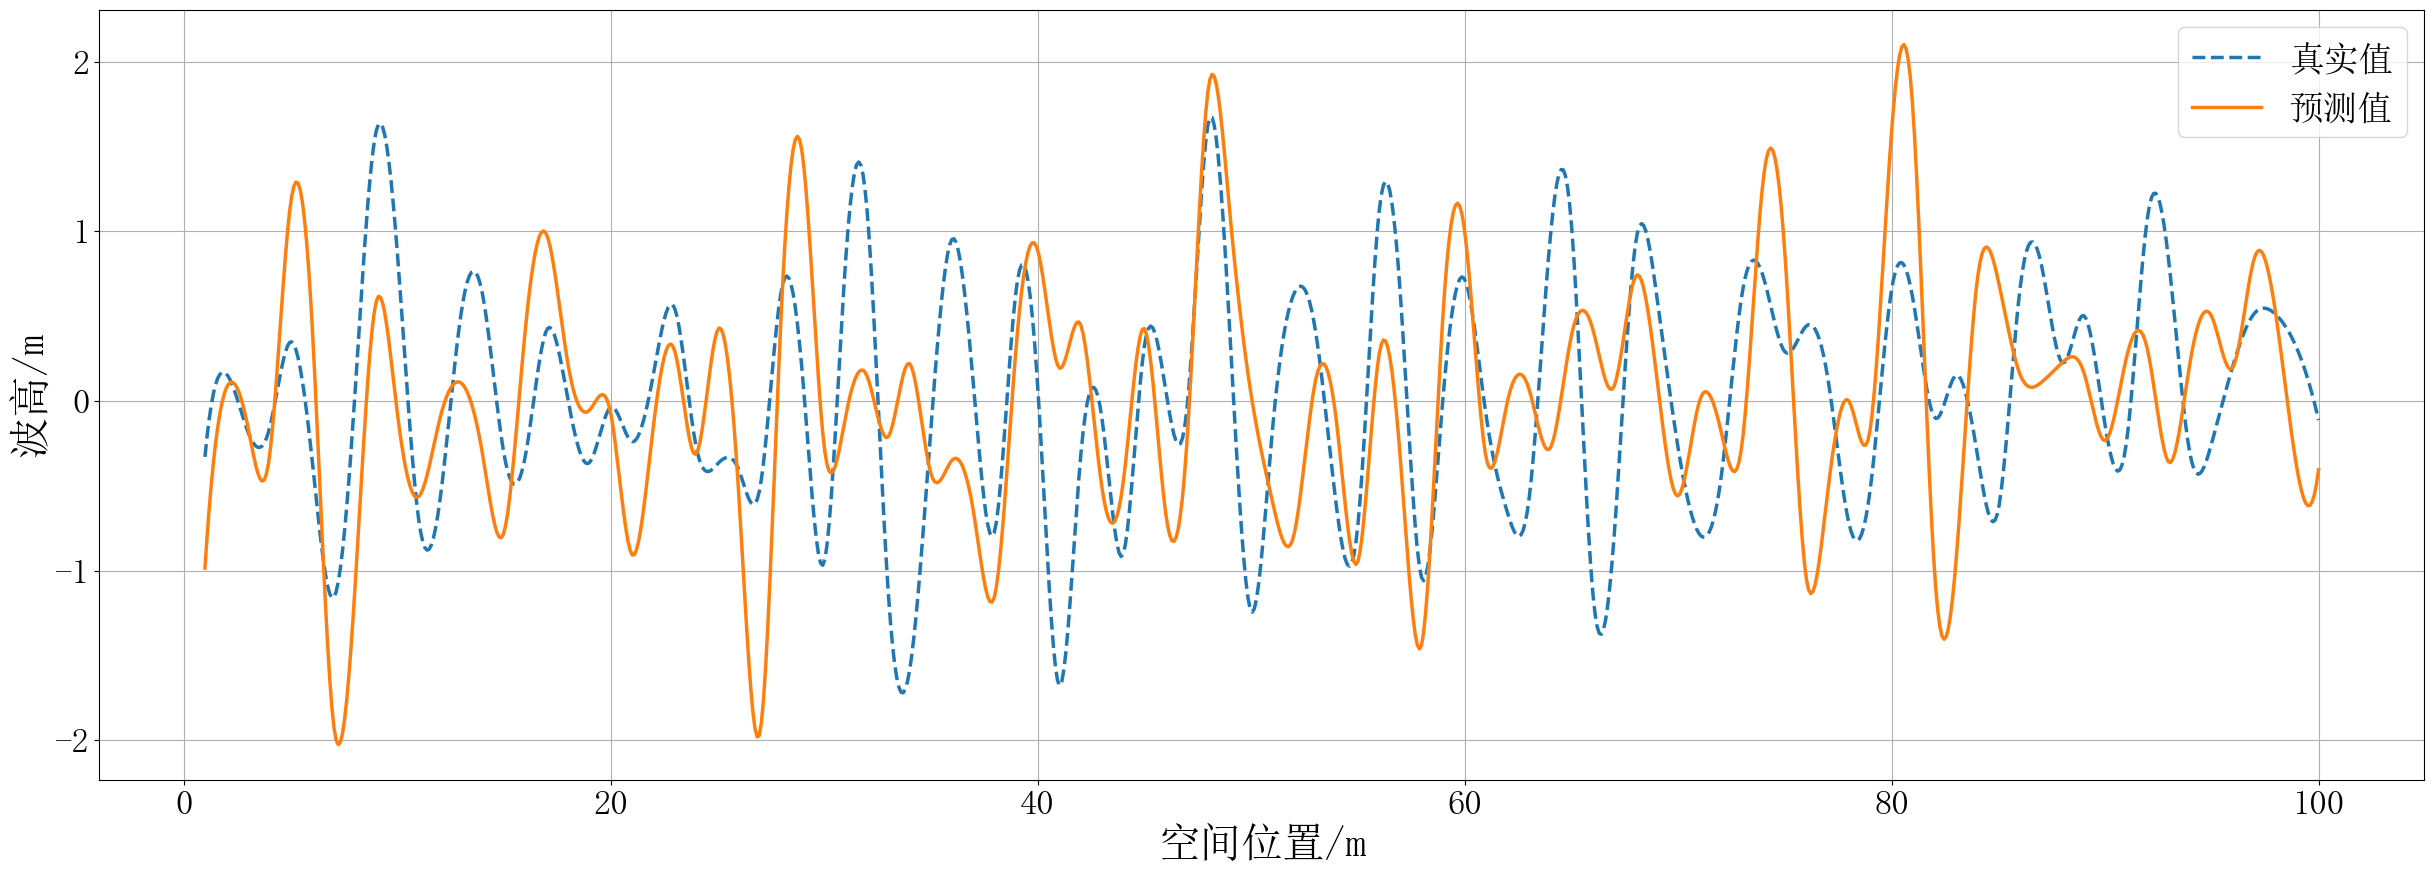

In [43]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np
from models.crnn import RNNnet , GRUnet, LSTMnet
import torch


data = np.load('data/6000_100.npy')
model = GRUnet().to('cuda')


    

# 加载预训练的参数
checkpoint = torch.load('checkpoints\GRU_0.01.pth')

# 将参数加载到模型中
model.load_state_dict(checkpoint)

X = data[5800:5830]
X = np.expand_dims(X, axis=0)
X_tensor = torch.Tensor(X).to('cuda')
pre = model(X_tensor)
prediction_array = pre.cpu().detach().numpy()
prediction = prediction_array[:,2,:].reshape(-1)

actual = data[5830:5960]
actual = actual[2,:]  

x = np.linspace(1, 100, 100) 
actual = interp1d(x, actual, kind='cubic')
prediction = interp1d(x,prediction, kind='cubic')
x_dense = np.linspace(1, 100, 1000)

plt.figure(figsize=(30, 10))
plt.plot(x_dense, actual(x_dense), '--', label='真实值',linewidth=2.5)
plt.plot(x_dense, prediction(x_dense), '-', label='预测值',linewidth=2.5)
plt.legend(fontsize=25)
plt.xticks(fontsize=25)  # 设置横坐标数字大小为 12
plt.yticks(fontsize=25)  # 设置纵坐标数字大小为 12
plt.xlabel('空间位置/m', fontsize=30)
plt.ylabel('波高/m', fontsize=30)
plt.grid(True)
plt.show()

(30, 100)


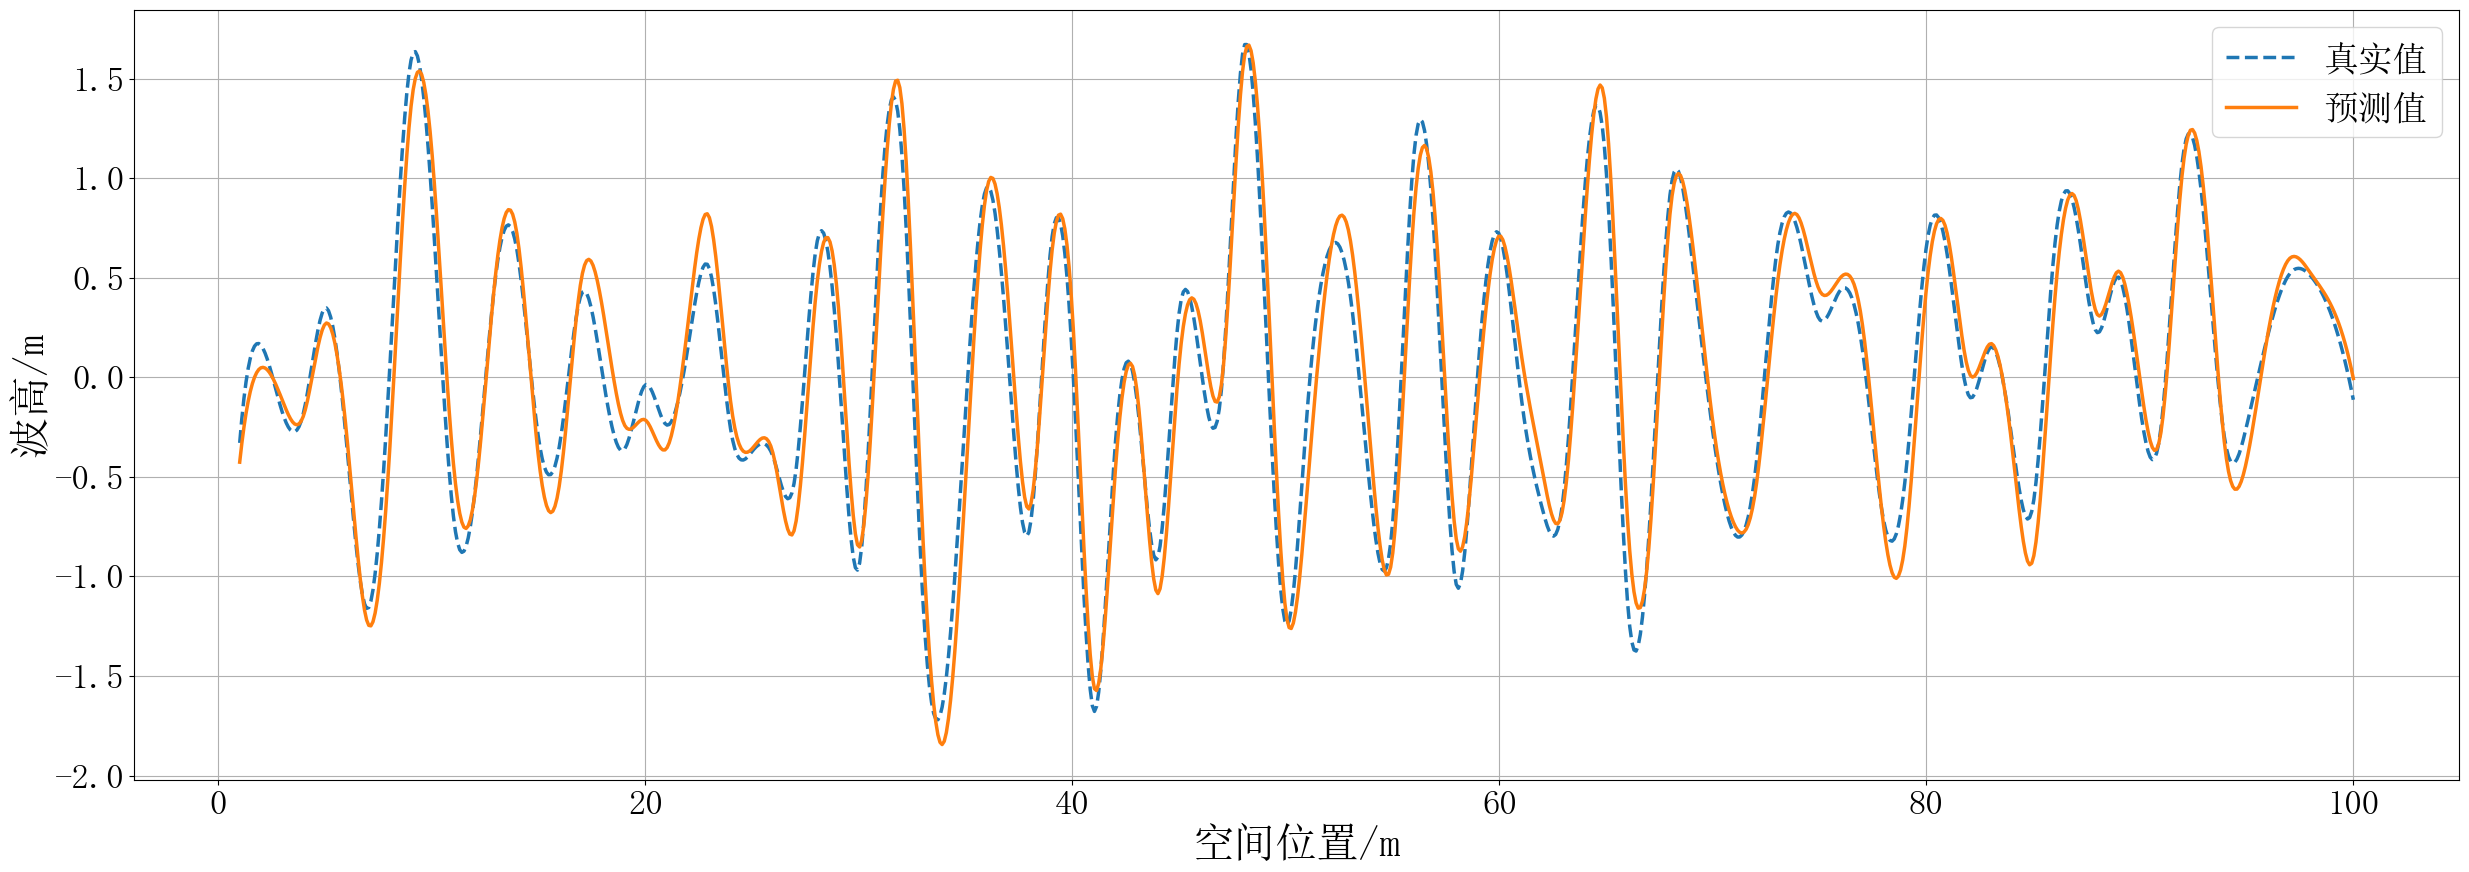

In [41]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np
from models.crnn import RNNnet , GRUnet, LSTMnet, CLSTMnet
import torch


data = np.load('data/6000_100.npy')
model = CLSTMnet().to('cuda')


    

# 加载预训练的参数
checkpoint = torch.load('checkpoints\CLSTMnet_0.01.pth')

# 将参数加载到模型中
model.load_state_dict(checkpoint)

X = data[5800:5830]
print(X.shape)
X = np.expand_dims(X, axis=0)
X_tensor = torch.Tensor(X).to('cuda').permute(0,2,1)
pre = model(X_tensor)
prediction_array = pre.cpu().detach().numpy()
prediction = prediction_array[:,2,:].reshape(-1)

actual = data[5830:5960]
actual = actual[2,:]  

x = np.linspace(1, 100, 100) 
actual = interp1d(x, actual, kind='cubic')
prediction = interp1d(x,prediction, kind='cubic')
x_dense = np.linspace(1, 100, 1000)

plt.figure(figsize=(30, 10))
plt.plot(x_dense, actual(x_dense), '--', label='真实值',linewidth=2.5)
plt.plot(x_dense, prediction(x_dense), '-', label='预测值',linewidth=2.5)
plt.legend(fontsize=25)
plt.xticks(fontsize=25)  # 设置横坐标数字大小为 12
plt.yticks(fontsize=25)  # 设置纵坐标数字大小为 12
plt.xlabel('空间位置/m', fontsize=30)
plt.ylabel('波高/m', fontsize=30)
plt.grid(True)
plt.show()

# 图3-6

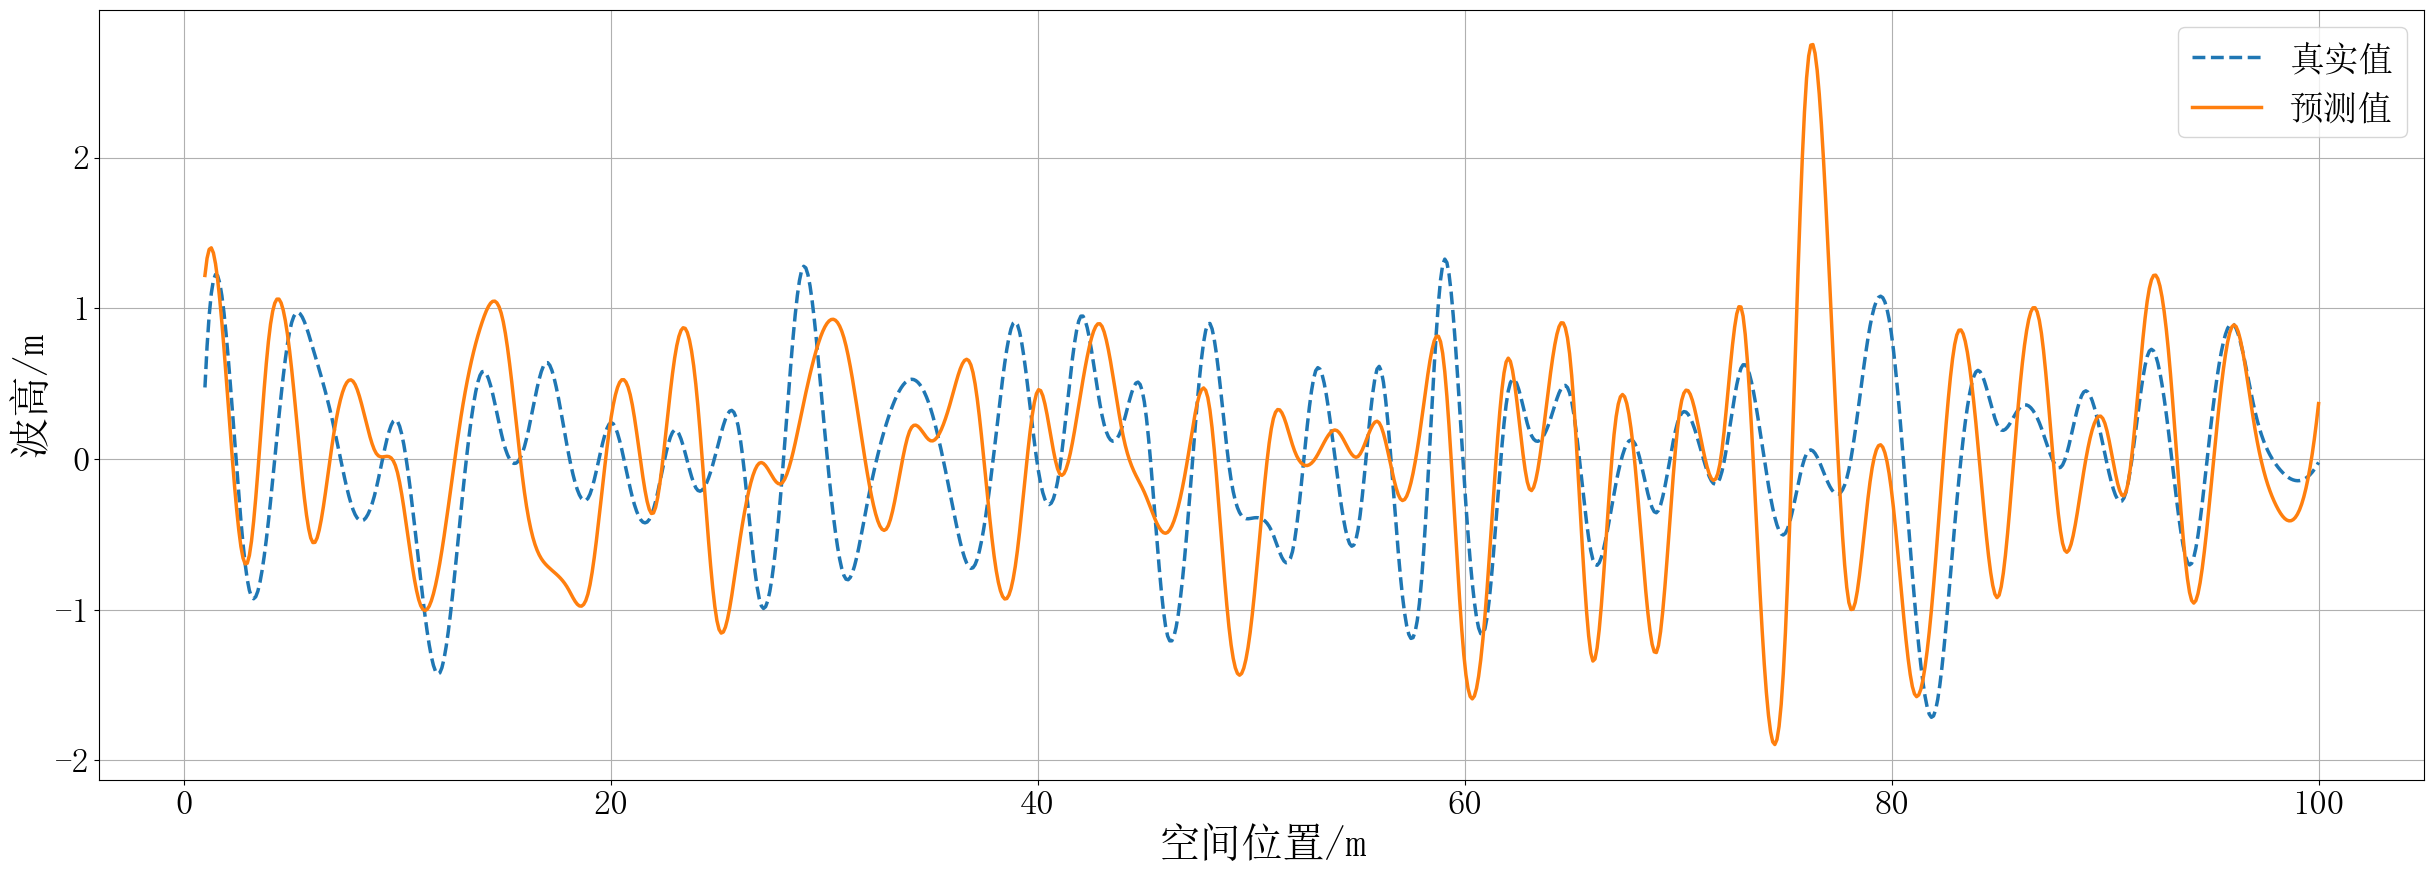

In [51]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np
from models.crnn import RNNnet , GRUnet, LSTMnet
import torch


data = np.load('data/6000_100.npy')
model = GRUnet().to('cuda')


    

# 加载预训练的参数
checkpoint = torch.load('checkpoints\GRU_0.01.pth')

# 将参数加载到模型中
model.load_state_dict(checkpoint)

X = data[2030:2060]
X = np.expand_dims(X, axis=0)
X_tensor = torch.Tensor(X).to('cuda')
pre = model(X_tensor)
prediction_array = pre.cpu().detach().numpy()
prediction = prediction_array[:,2,:].reshape(-1)

actual = data[2060:2090]
actual = actual[2,:]  

x = np.linspace(1, 100, 100) 
actual = interp1d(x, actual, kind='cubic')
prediction = interp1d(x,prediction, kind='cubic')
x_dense = np.linspace(1, 100, 1000)

plt.figure(figsize=(30, 10))
plt.plot(x_dense, actual(x_dense), '--', label='真实值',linewidth=2.5)
plt.plot(x_dense, prediction(x_dense), '-', label='预测值',linewidth=2.5)
plt.legend(fontsize=25)
plt.xticks(fontsize=25)  # 设置横坐标数字大小为 12
plt.yticks(fontsize=25)  # 设置纵坐标数字大小为 12
plt.xlabel('空间位置/m', fontsize=30)
plt.ylabel('波高/m', fontsize=30)
plt.grid(True)
plt.show()

# 图3-8

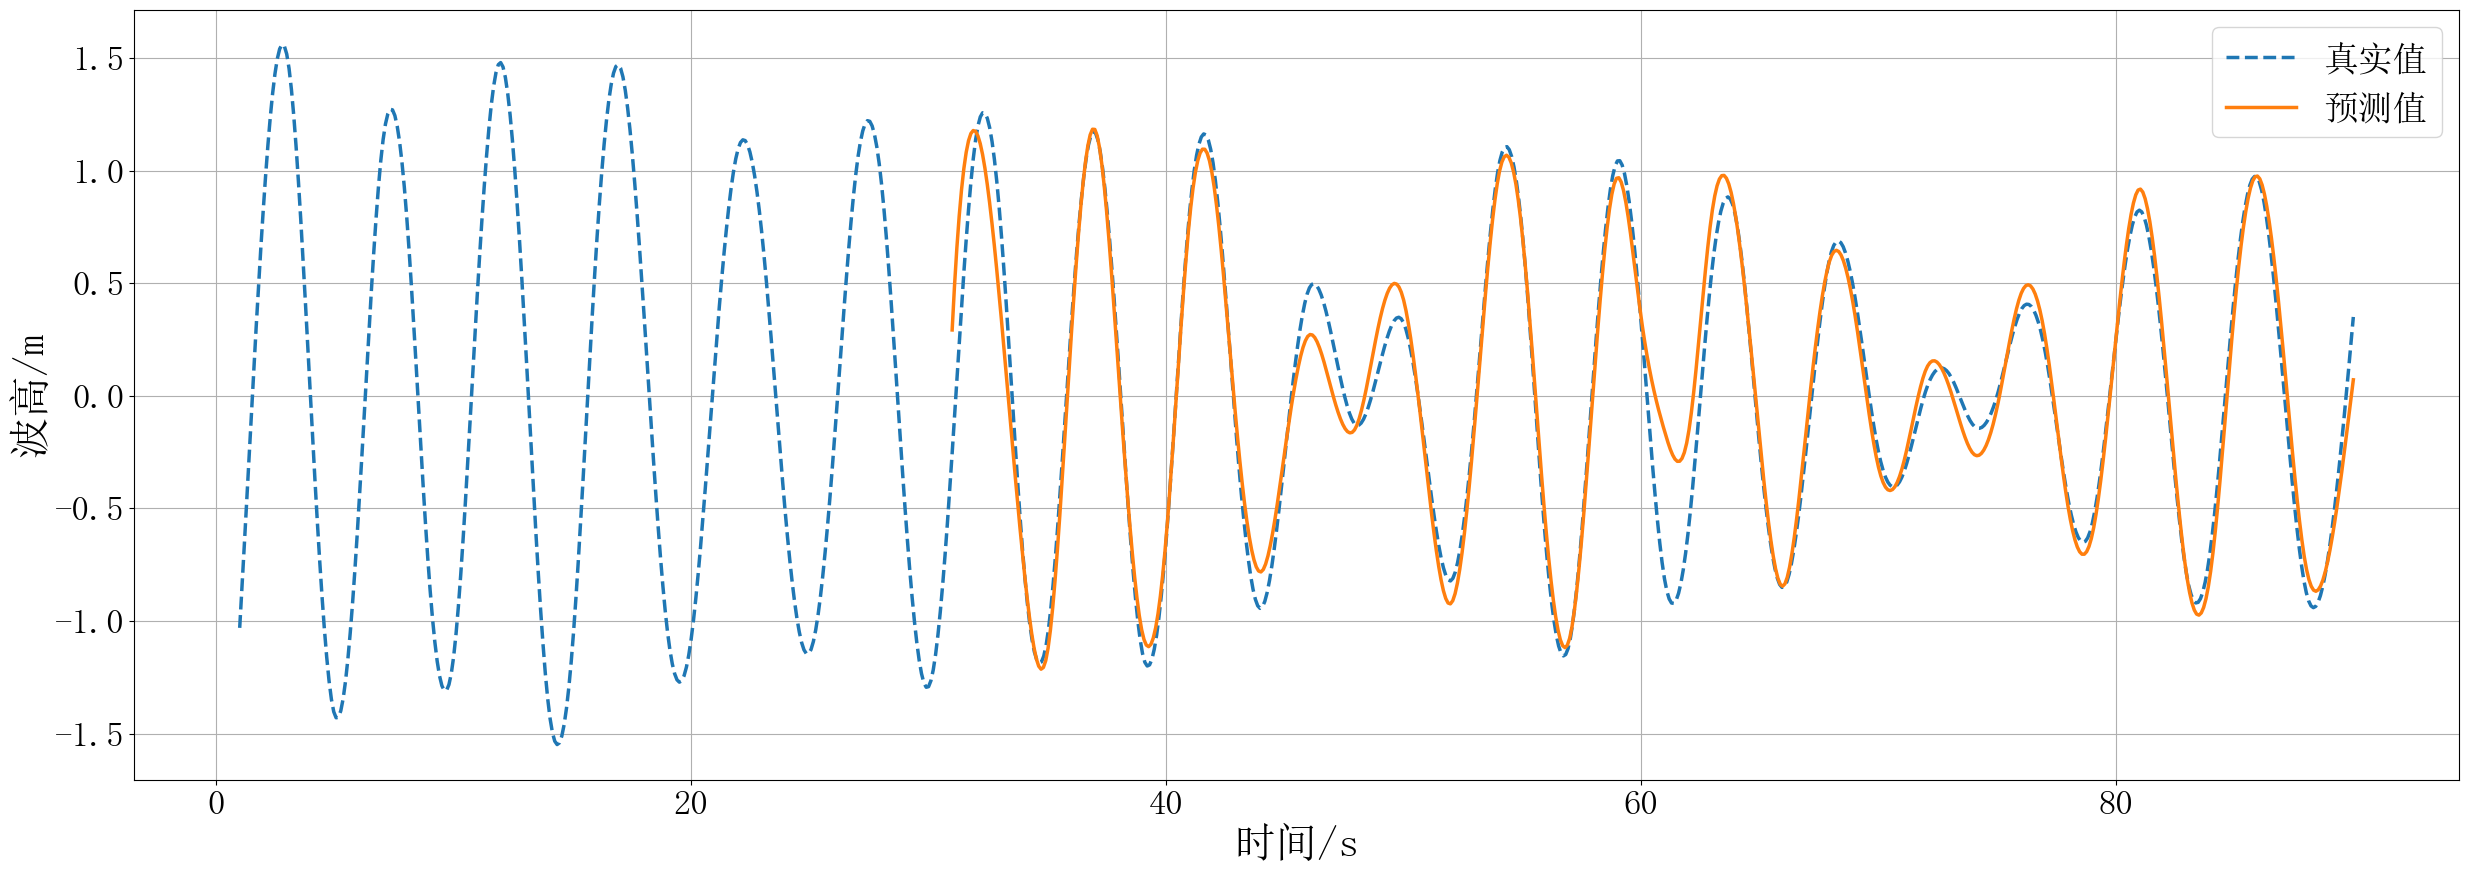

In [59]:
from scipy.interpolate import interp1d
import numpy as np
from models.crnn import RNNnet , GRUnet, LSTMnet, CLSTMnet
import torch


data = np.load('data/6000_100.npy')
model = CLSTMnet().to('cuda')


    

# 加载预训练的参数
checkpoint = torch.load('checkpoints\CLSTMnet_0.01.pth')

# 将参数加载到模型中
model.load_state_dict(checkpoint)

X = data[5800:5830]
X = np.expand_dims(X, axis=0)
X_tensor = torch.Tensor(X).to('cuda').permute(0,2,1)
pre_1 = model(X_tensor)
pre = pre_1.permute(0,2,1)
pre_2 = model(pre)


prediction_array_1 = pre_1.cpu().detach().numpy()
prediction_array_2 = pre_2.cpu().detach().numpy()


array1 = prediction_array_1[:,:,30]
array2 = prediction_array_2[:,:,30]


concatenated_array = np.concatenate((array1, array2), axis=1).reshape(-1)

# prediction = prediction_array[:,6,:].reshape(-1)

actual = data[5800:5890]
actual = actual[:,30]  

x_1 = np.linspace(1, 90, 90) 
x_2 = np.linspace(31, 90, 60) 

actual = interp1d(x_1, actual, kind='cubic')
prediction = interp1d(x_2,concatenated_array, kind='cubic')
x_dense_1 = np.linspace(1, 90, 900)
x_dense_2 = np.linspace(31, 90, 600)


plt.figure(figsize=(30, 10))
plt.plot(x_dense_1, actual(x_dense_1), '--', label='真实值',linewidth=2.5)
plt.plot(x_dense_2, prediction(x_dense_2), '-', label='预测值',linewidth=2.5)
plt.legend(fontsize=25)

plt.xticks(fontsize=25)  # 设置横坐标数字大小为 12
plt.yticks(fontsize=25)  # 设置纵坐标数字大小为 12
plt.xlabel('时间/s', fontsize=30)
plt.ylabel('波高/m', fontsize=30)
plt.grid(True)
plt.savefig('CRNN_NO70_60s.png')
plt.show()

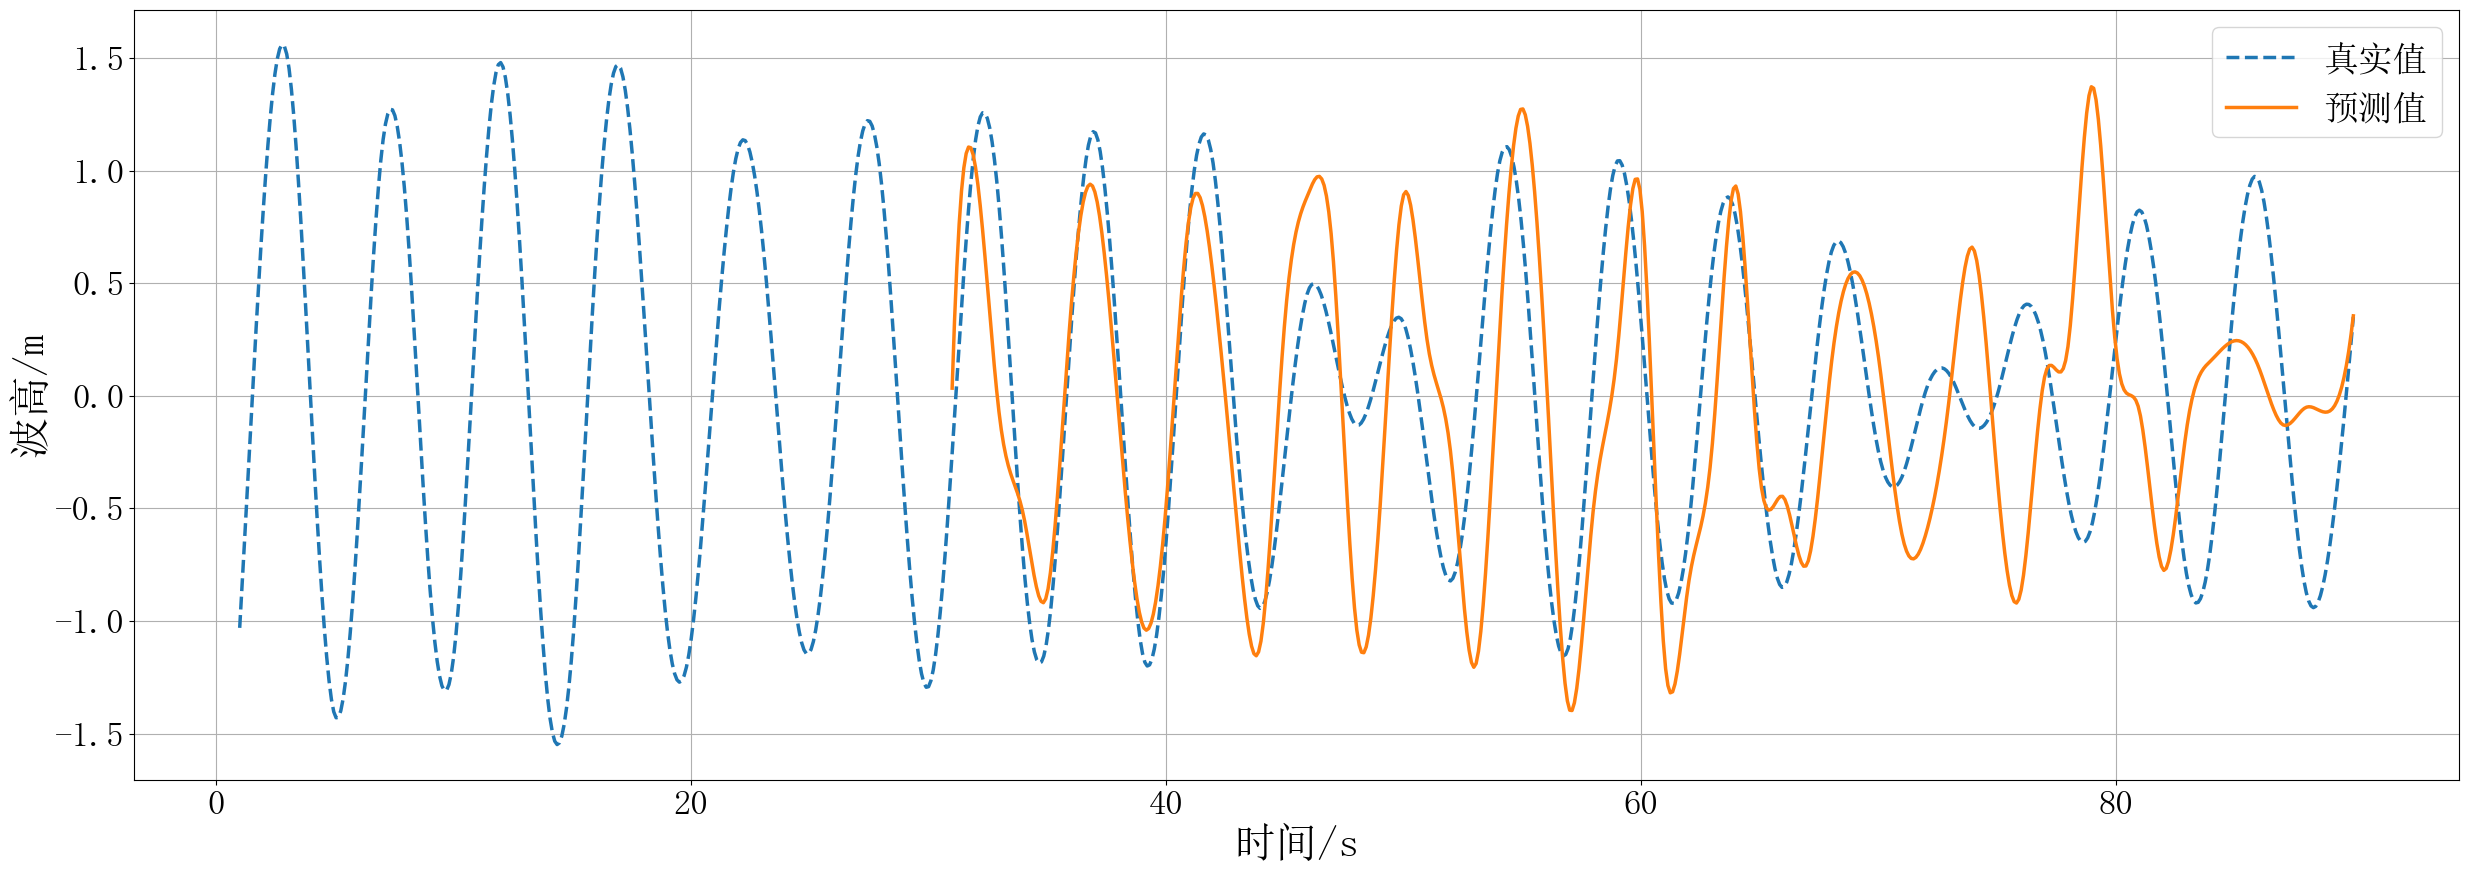

In [58]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np


from models.crnn import RNNnet , GRUnet, LSTMnet, CLSTMnet
import torch


data = np.load('data/6000_100.npy')
model = GRUnet().to('cuda')


    

# 加载预训练的参数
checkpoint = torch.load('checkpoints\GRU_0.01.pth')

# 将参数加载到模型中
model.load_state_dict(checkpoint)

X = data[5800:5830]
X = np.expand_dims(X, axis=0)
X_tensor = torch.Tensor(X).to('cuda')
pre_1 = model(X_tensor)
pre = pre_1
pre_2 = model(pre)


prediction_array_1 = pre_1.cpu().detach().numpy()
prediction_array_2 = pre_2.cpu().detach().numpy()


array1 = prediction_array_1[:,:,30]
array2 = prediction_array_2[:,:,30]


concatenated_array = np.concatenate((array1, array2), axis=1).reshape(-1)

# prediction = prediction_array[:,6,:].reshape(-1)

actual = data[5800:5890]
actual = actual[:,30]  

x_1 = np.linspace(1, 90, 90) 
x_2 = np.linspace(31, 90, 60) 

actual = interp1d(x_1, actual, kind='cubic')
prediction = interp1d(x_2,concatenated_array, kind='cubic')
x_dense_1 = np.linspace(1, 90, 900)
x_dense_2 = np.linspace(31, 90, 600)


plt.figure(figsize=(30, 10))
plt.plot(x_dense_1, actual(x_dense_1), '--', label='真实值',linewidth=2.5)
plt.plot(x_dense_2, prediction(x_dense_2), '-', label='预测值',linewidth=2.5)
plt.legend(fontsize=25)

plt.xticks(fontsize=25)  # 设置横坐标数字大小为 12
plt.yticks(fontsize=25)  # 设置纵坐标数字大小为 12
plt.xlabel('时间/s', fontsize=30)
plt.ylabel('波高/m', fontsize=30)
plt.grid(True)
plt.savefig('CRNN_NO70_60s.png')
plt.show()

# 图3-9

(30, 100)


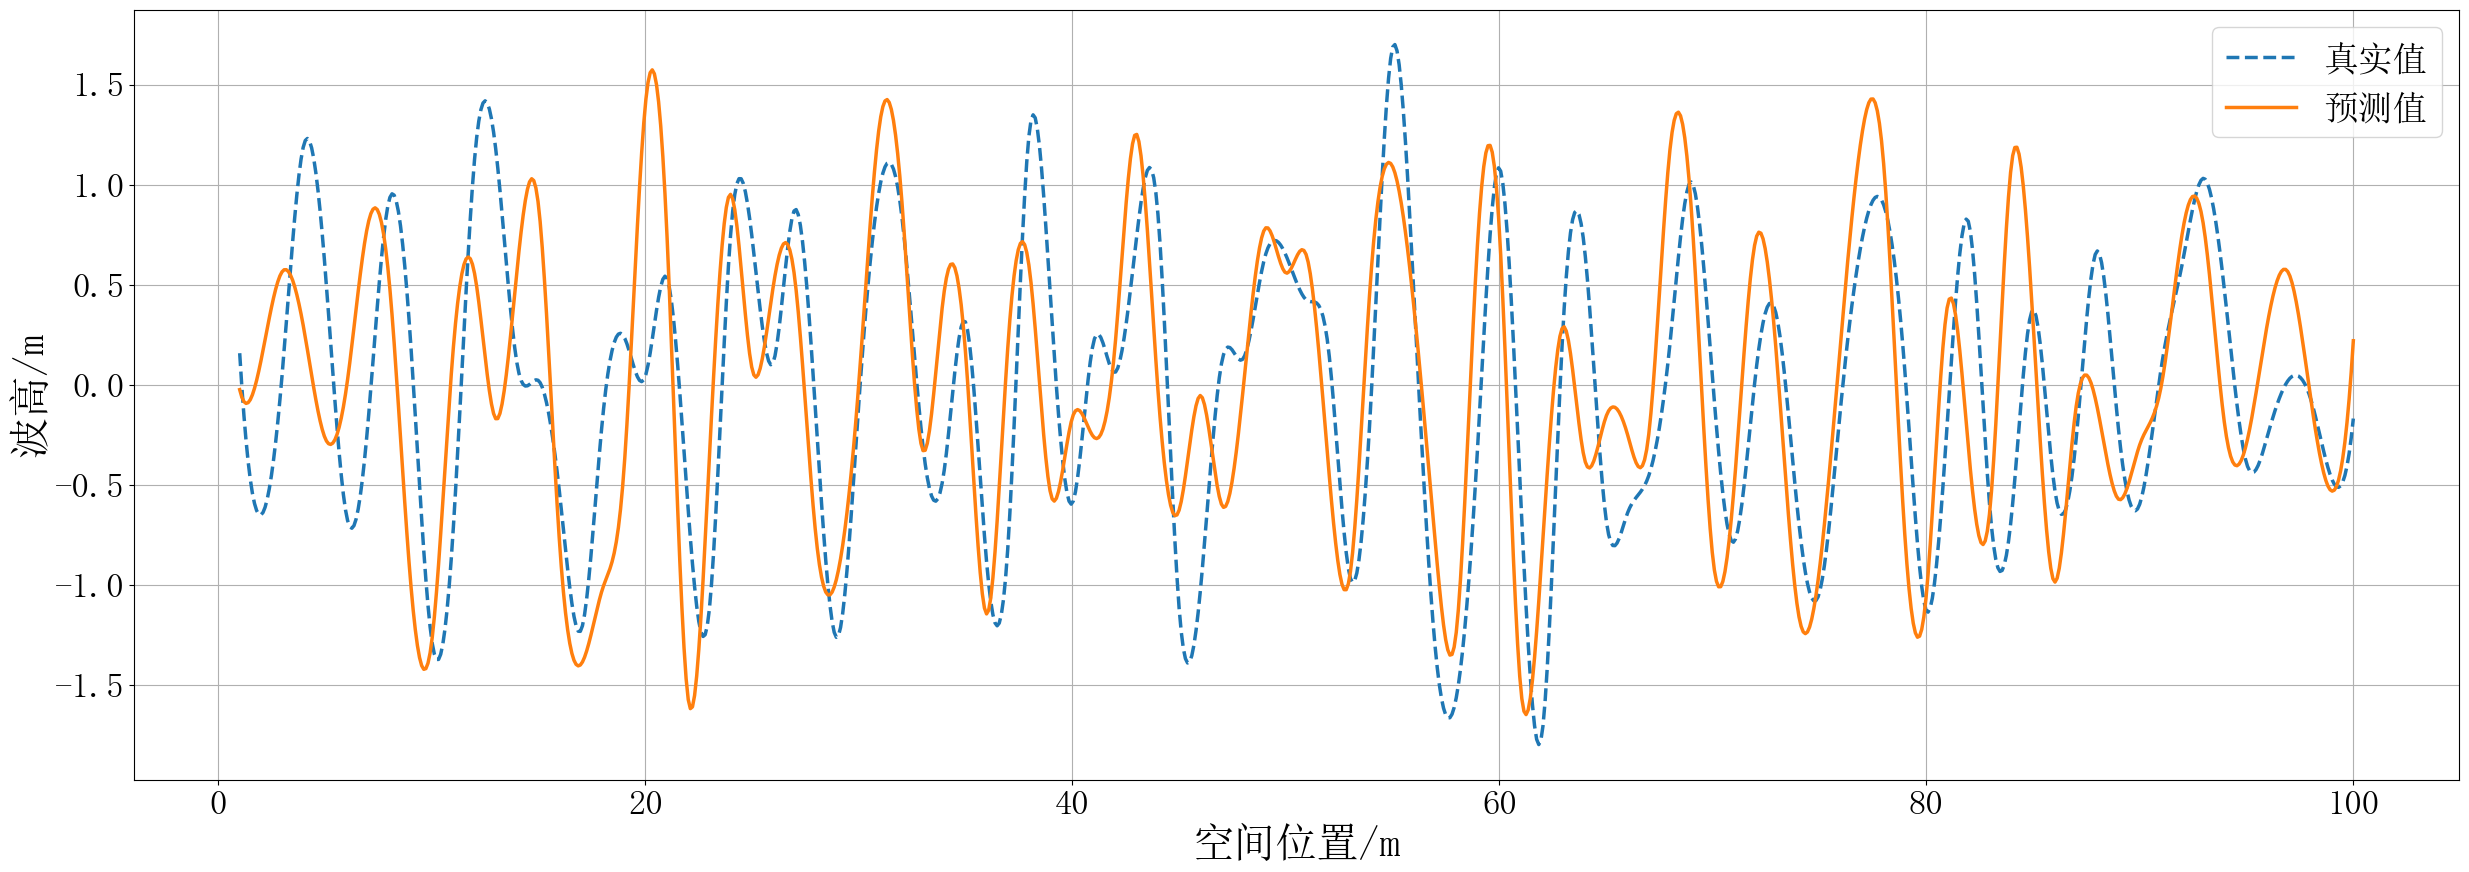

In [75]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np
from models.crnn import RNNnet , GRUnet, LSTMnet, CLSTMnet
import torch


data = np.load('data/6000_100.npy')
model = CLSTMnet().to('cuda')


    

# 加载预训练的参数
checkpoint = torch.load('checkpoints\CLSTMnet_0.01.pth')

# 将参数加载到模型中
model.load_state_dict(checkpoint)

X = data[5800:5830]
print(X.shape)
X = np.expand_dims(X, axis=0)
X_tensor = torch.Tensor(X).to('cuda').permute(0,2,1)
pre = model(X_tensor)
pre = pre.permute(0,2,1)
pre = model(pre)
pre = pre.permute(0,2,1)
pre = model(pre)
pre = pre.permute(0,2,1)
pre = model(pre)
pre = pre.permute(0,2,1)
pre = model(pre)
pre = pre.permute(0,2,1)
pre = model(pre)
prediction_array = pre.cpu().detach().numpy()
prediction = prediction_array[:,3,:].reshape(-1)

actual = data[5990:5999]
actual = actual[3,:]  

x = np.linspace(1, 100, 100) 
actual = interp1d(x, actual, kind='cubic')
prediction = interp1d(x,prediction, kind='cubic')
x_dense = np.linspace(1, 100, 1000)

plt.figure(figsize=(30, 10))
plt.plot(x_dense, actual(x_dense), '--', label='真实值',linewidth=2.5)
plt.plot(x_dense, prediction(x_dense), '-', label='预测值',linewidth=2.5)
plt.legend(fontsize=25)
plt.xticks(fontsize=25)  # 设置横坐标数字大小为 12
plt.yticks(fontsize=25)  # 设置纵坐标数字大小为 12
plt.xlabel('空间位置/m', fontsize=30)
plt.ylabel('波高/m', fontsize=30)
plt.grid(True)
plt.show()